<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Metrik_Evaluasi_Model_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score, precision_recall_curve, auc)

#   Memuat & Menyiapkan Data ---
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
#   Latih Model & Buat Prediksi ---
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilitas kelas positif

#   Cetak Metrik Evaluasi ---
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.4f}\n")
print("======= Laporan Klasifikasi Detail =======")
print(classification_report(y_test, y_pred, target_names=data.target_names))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Akurasi Model: 0.9766

======= Laporan Klasifikasi Detail =======
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC AUC Score: 0.9976


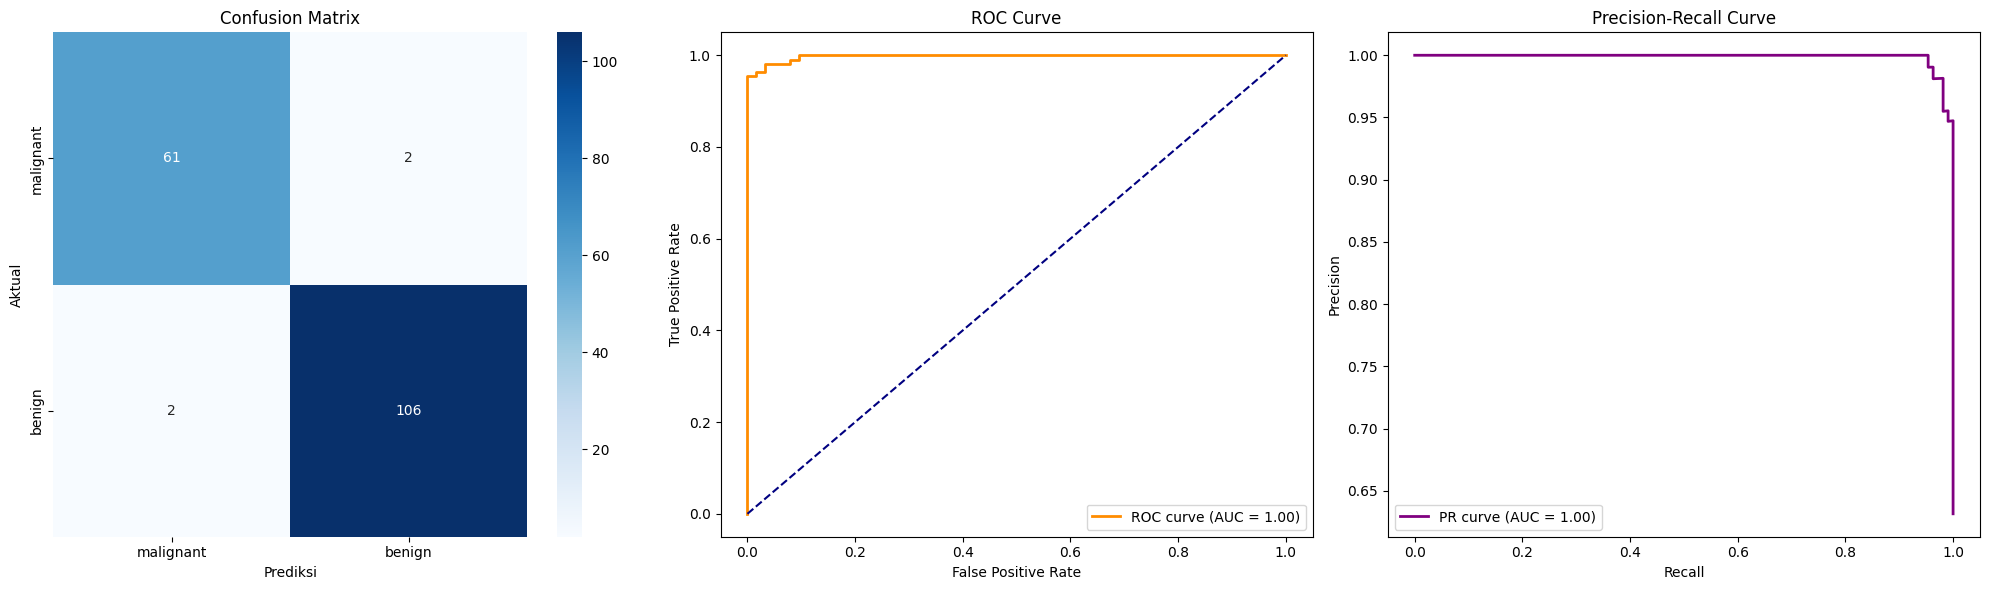

In [3]:
#   Tampilkan 3 Visualisasi ---
plt.figure(figsize=(20, 6))

# Visual 1: Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi'); plt.ylabel('Aktual')

# Visual 2: ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Visual 3: Precision-Recall Curve
plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()